#import libraries

In [4]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import spacy
from sklearn.feature_extraction.text import CountVectorizer
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#import yelp review data set and save data into csv file

In [5]:
# Once you excute this code sucessfully no need to run it again
with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as json_type_file:
    data = [json.loads(line) for line in json_type_file]

In [6]:
# count length of the array
number_of_rows = len(data)
number_of_rows

6990280

In [7]:
# add data into a dataframe
df = pd.DataFrame(data[:50000])

In [8]:
df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [9]:
# save it in a csv file
df.to_csv('yelp_reviews.csv', index=False)

In [10]:
# import csv file
df1 = pd.read_csv('yelp_reviews.csv')

In [11]:
df1.shape

(50000, 9)

#data cleaning

In [12]:
df1.head(6)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [13]:
df2 = df1.drop(['review_id','user_id','business_id','useful','funny','cool','date'] ,axis=1 , inplace=False)

In [14]:
df2.head(6)

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...
5,1.0,I am a long term frequent customer of this est...


In [15]:
df2.isnull().sum()

stars    0
text     0
dtype: int64

In [16]:
df2.duplicated().sum()

10

In [17]:
df3 = df2.drop_duplicates(inplace=False)

In [18]:
df3.duplicated().sum()

0

In [19]:
df3.head(6)

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...
5,1.0,I am a long term frequent customer of this est...


<Axes: title={'center': 'Review Stars'}, xlabel='stars'>

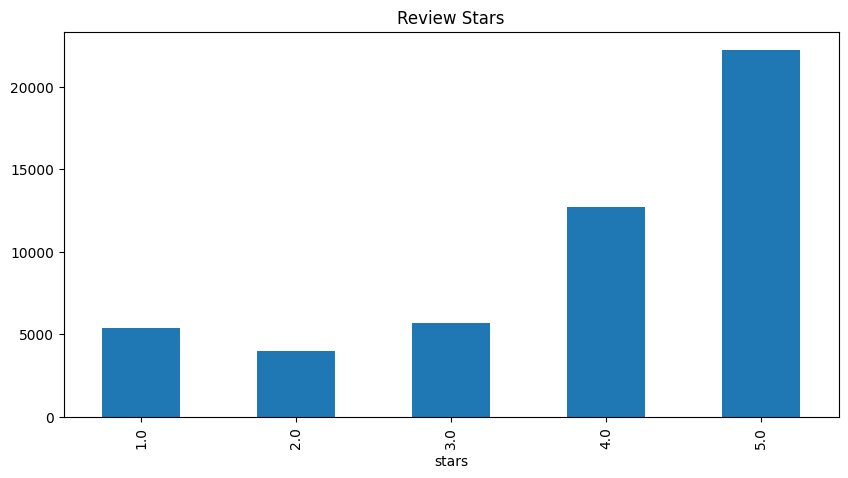

In [20]:
df3['stars'].value_counts().sort_index().plot(kind='bar', title="Review Stars", figsize=(10,5))

In [21]:
# 0 - negative
# 1 - neutral
# 2 - positive

# Function to convert score to sentiment
def sentiment(rating):
    
    rating = int(rating)
    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

# Apply to the dataset 
df3['sentiment'] = df3['stars'].apply(sentiment)

/var/folders/9k/n2z_fy356vvg23tgnsxtcqy00000gn/T/ipykernel_974/4007003634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment'] = df3['stars'].apply(sentiment)


In [22]:
df3.head(5)

,stars,text,sentiment
0,3.0,"If you decide to eat here, just be aware it is...",1
1,5.0,I've taken a lot of spin classes over the year...,2
2,3.0,Family diner. Had the buffet. Eclectic assortm...,1
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2
4,4.0,Cute interior and owner (?) gave us tour of up...,2


In [23]:
df3['sentiment'].value_counts().sort_index()

sentiment
0     9380
1     5677
2    34933
Name: count, dtype: int64

In [24]:
df4=df3.iloc[:20000]
df4

,stars,text,sentiment
0,3.0,"If you decide to eat here, just be aware it is...",1
1,5.0,I've taken a lot of spin classes over the year...,2
2,3.0,Family diner. Had the buffet. Eclectic assortm...,1
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2
4,4.0,Cute interior and owner (?) gave us tour of up...,2
...,...,...,...
19997,2.0,Unfortunately we had a bad experience here...w...,0
19998,2.0,Meh. This pizza was basically a deep-dish grea...,0
19999,5.0,This place is amazing. Excellent sushi burrito...,2
20000,4.0,Blue Claws can be pricey but phenomenal. Stick...,2


In [25]:
df4['sentiment'].value_counts().sort_index()

sentiment
0     3726
1     2241
2    14033
Name: count, dtype: int64

In [26]:
count_class_2, count_class_0 , count_class_1 = df4.sentiment.value_counts()

df_class_0 = df4[df4['sentiment'] == 0]
df_class_1 = df4[df4['sentiment'] == 1]
df_class_2 = df4[df4['sentiment'] == 2]

In [27]:
count_class_2 , count_class_0, count_class_1

(14033, 3726, 2241)

In [28]:
df_class_2.shape

(14033, 3)

In [29]:
df_class_1.shape

(2241, 3)

In [30]:
df_class_0.shape

(3726, 3)

In [31]:
df_class_0_over = df_class_0.sample(count_class_2, replace=True)
df_class_1_over = df_class_1.sample(count_class_2, replace=True)

In [32]:
df_class_0_over.shape , df_class_1_over.shape

((14033, 3), (14033, 3))

In [33]:
df4 = pd.concat([df_class_2,df_class_1_over,df_class_0_over], axis=0)

In [34]:
df4['sentiment'].value_counts().sort_index

<bound method Series.sort_index of sentiment
2    14033
1    14033
0    14033
Name: count, dtype: int64>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.nn import CrossEntropyLoss
import torch.nn as nn
import torch
from tqdm import tqdm

/Users/sinali/Desktop/IIT/AI & DS 3rd year/Deep Learning/CW/CW2/Code new/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_data(data, tokenizer, max_length=128):
    tokenized = tokenizer(data['text'].tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    labels = torch.tensor(data['sentiment'].tolist())
    return tokenized, labels

In [37]:
train_data, test_data = train_test_split(df4, test_size=0.2, random_state=42)
train_data['text'] = train_data['text'].astype(str)
test_data['text'] = test_data['text'].astype(str)
print(train_data['text'].apply(type).value_counts())

print(train_data['text'].dtype)

text
<class 'str'>    33679
Name: count, dtype: int64
object


In [38]:
# Tokenize training and testing data
train_encodings, train_labels = tokenize_data(train_data, tokenizer)
test_encodings, test_labels = tokenize_data(test_data, tokenizer)

In [39]:
# Model definition
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df4['sentiment'].unique()))
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/sinali/Desktop/IIT/AI & DS 3rd year/Deep Learning/CW/CW2/Code new/.venv/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
# Convert data to PyTorch tensors
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

In [41]:
# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [42]:
epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {avg_loss:.4f}')

Epoch 1/10: 100%|██████████| 4210/4210 [2:09:01<00:00,  1.84s/it]  


Epoch 1/10, Average Loss: 0.4185


Epoch 2/10: 100%|██████████| 4210/4210 [1:39:16<00:00,  1.41s/it]


Epoch 2/10, Average Loss: 0.1469


Epoch 3/10: 100%|██████████| 4210/4210 [1:52:15<00:00,  1.60s/it]


Epoch 3/10, Average Loss: 0.0670


Epoch 4/10: 100%|██████████| 4210/4210 [2:01:40<00:00,  1.73s/it]  


Epoch 4/10, Average Loss: 0.0426


Epoch 5/10: 100%|██████████| 4210/4210 [1:34:57<00:00,  1.35s/it]


Epoch 5/10, Average Loss: 0.0273


Epoch 6/10: 100%|██████████| 4210/4210 [1:34:32<00:00,  1.35s/it]


Epoch 6/10, Average Loss: 0.0227


Epoch 7/10: 100%|██████████| 4210/4210 [1:35:45<00:00,  1.36s/it]


Epoch 7/10, Average Loss: 0.0181


Epoch 8/10: 100%|██████████| 4210/4210 [1:37:14<00:00,  1.39s/it]


Epoch 8/10, Average Loss: 0.0140


Epoch 9/10: 100%|██████████| 4210/4210 [1:43:25<00:00,  1.47s/it]  


Epoch 9/10, Average Loss: 0.0148


Epoch 10/10: 100%|██████████| 4210/4210 [1:46:06<00:00,  1.51s/it]

Epoch 10/10, Average Loss: 0.0141


In [43]:
model.save_pretrained("saved_model.h5")
tokenizer.save_pretrained("saved_model2.h5")

('saved_model2.h5/tokenizer_config.json',
 'saved_model2.h5/special_tokens_map.json',
 'saved_model2.h5/vocab.txt',
 'saved_model2.h5/added_tokens.json')

In [44]:
model2 = BertForSequenceClassification.from_pretrained("./saved_model.h5")

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation loop
model2.eval()
total_correct = 0
total_samples = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)
        
         # Append true labels and predicted labels
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predictions.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

class_report = classification_report(all_labels, all_preds)
print(f'Classification Report:\n{class_report}')

Evaluating: 100%|██████████| 1053/1053 [09:37<00:00,  1.82it/s]

Test Accuracy: 97.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2805
           1       0.97      0.97      0.97      2757
           2       0.97      0.96      0.97      2858

    accuracy                           0.97      8420
   macro avg       0.97      0.97      0.97      8420
weighted avg       0.97      0.97      0.97      8420



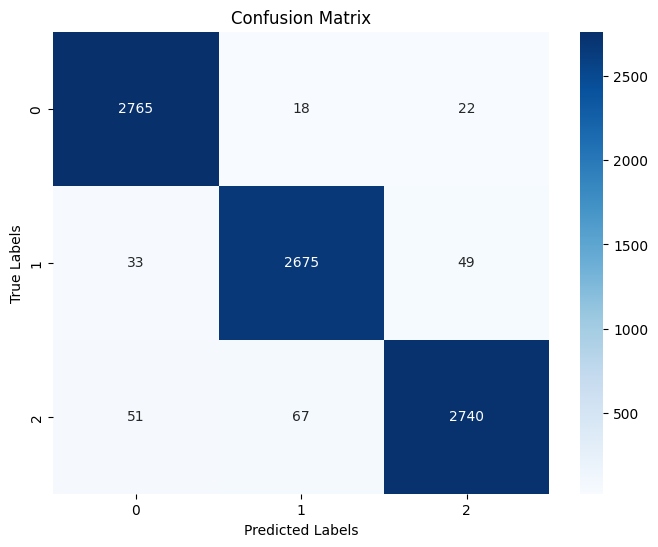

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

conf_matrix = confusion_matrix(all_labels, all_preds)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()